# Research Precision and Recall - 10/6/15

In [2]:
from IPython.display import HTML, Image

In [11]:
Image('./precision-recall/classifiers.png')

In [13]:
Image('./precision-recall/classifiers2.png')

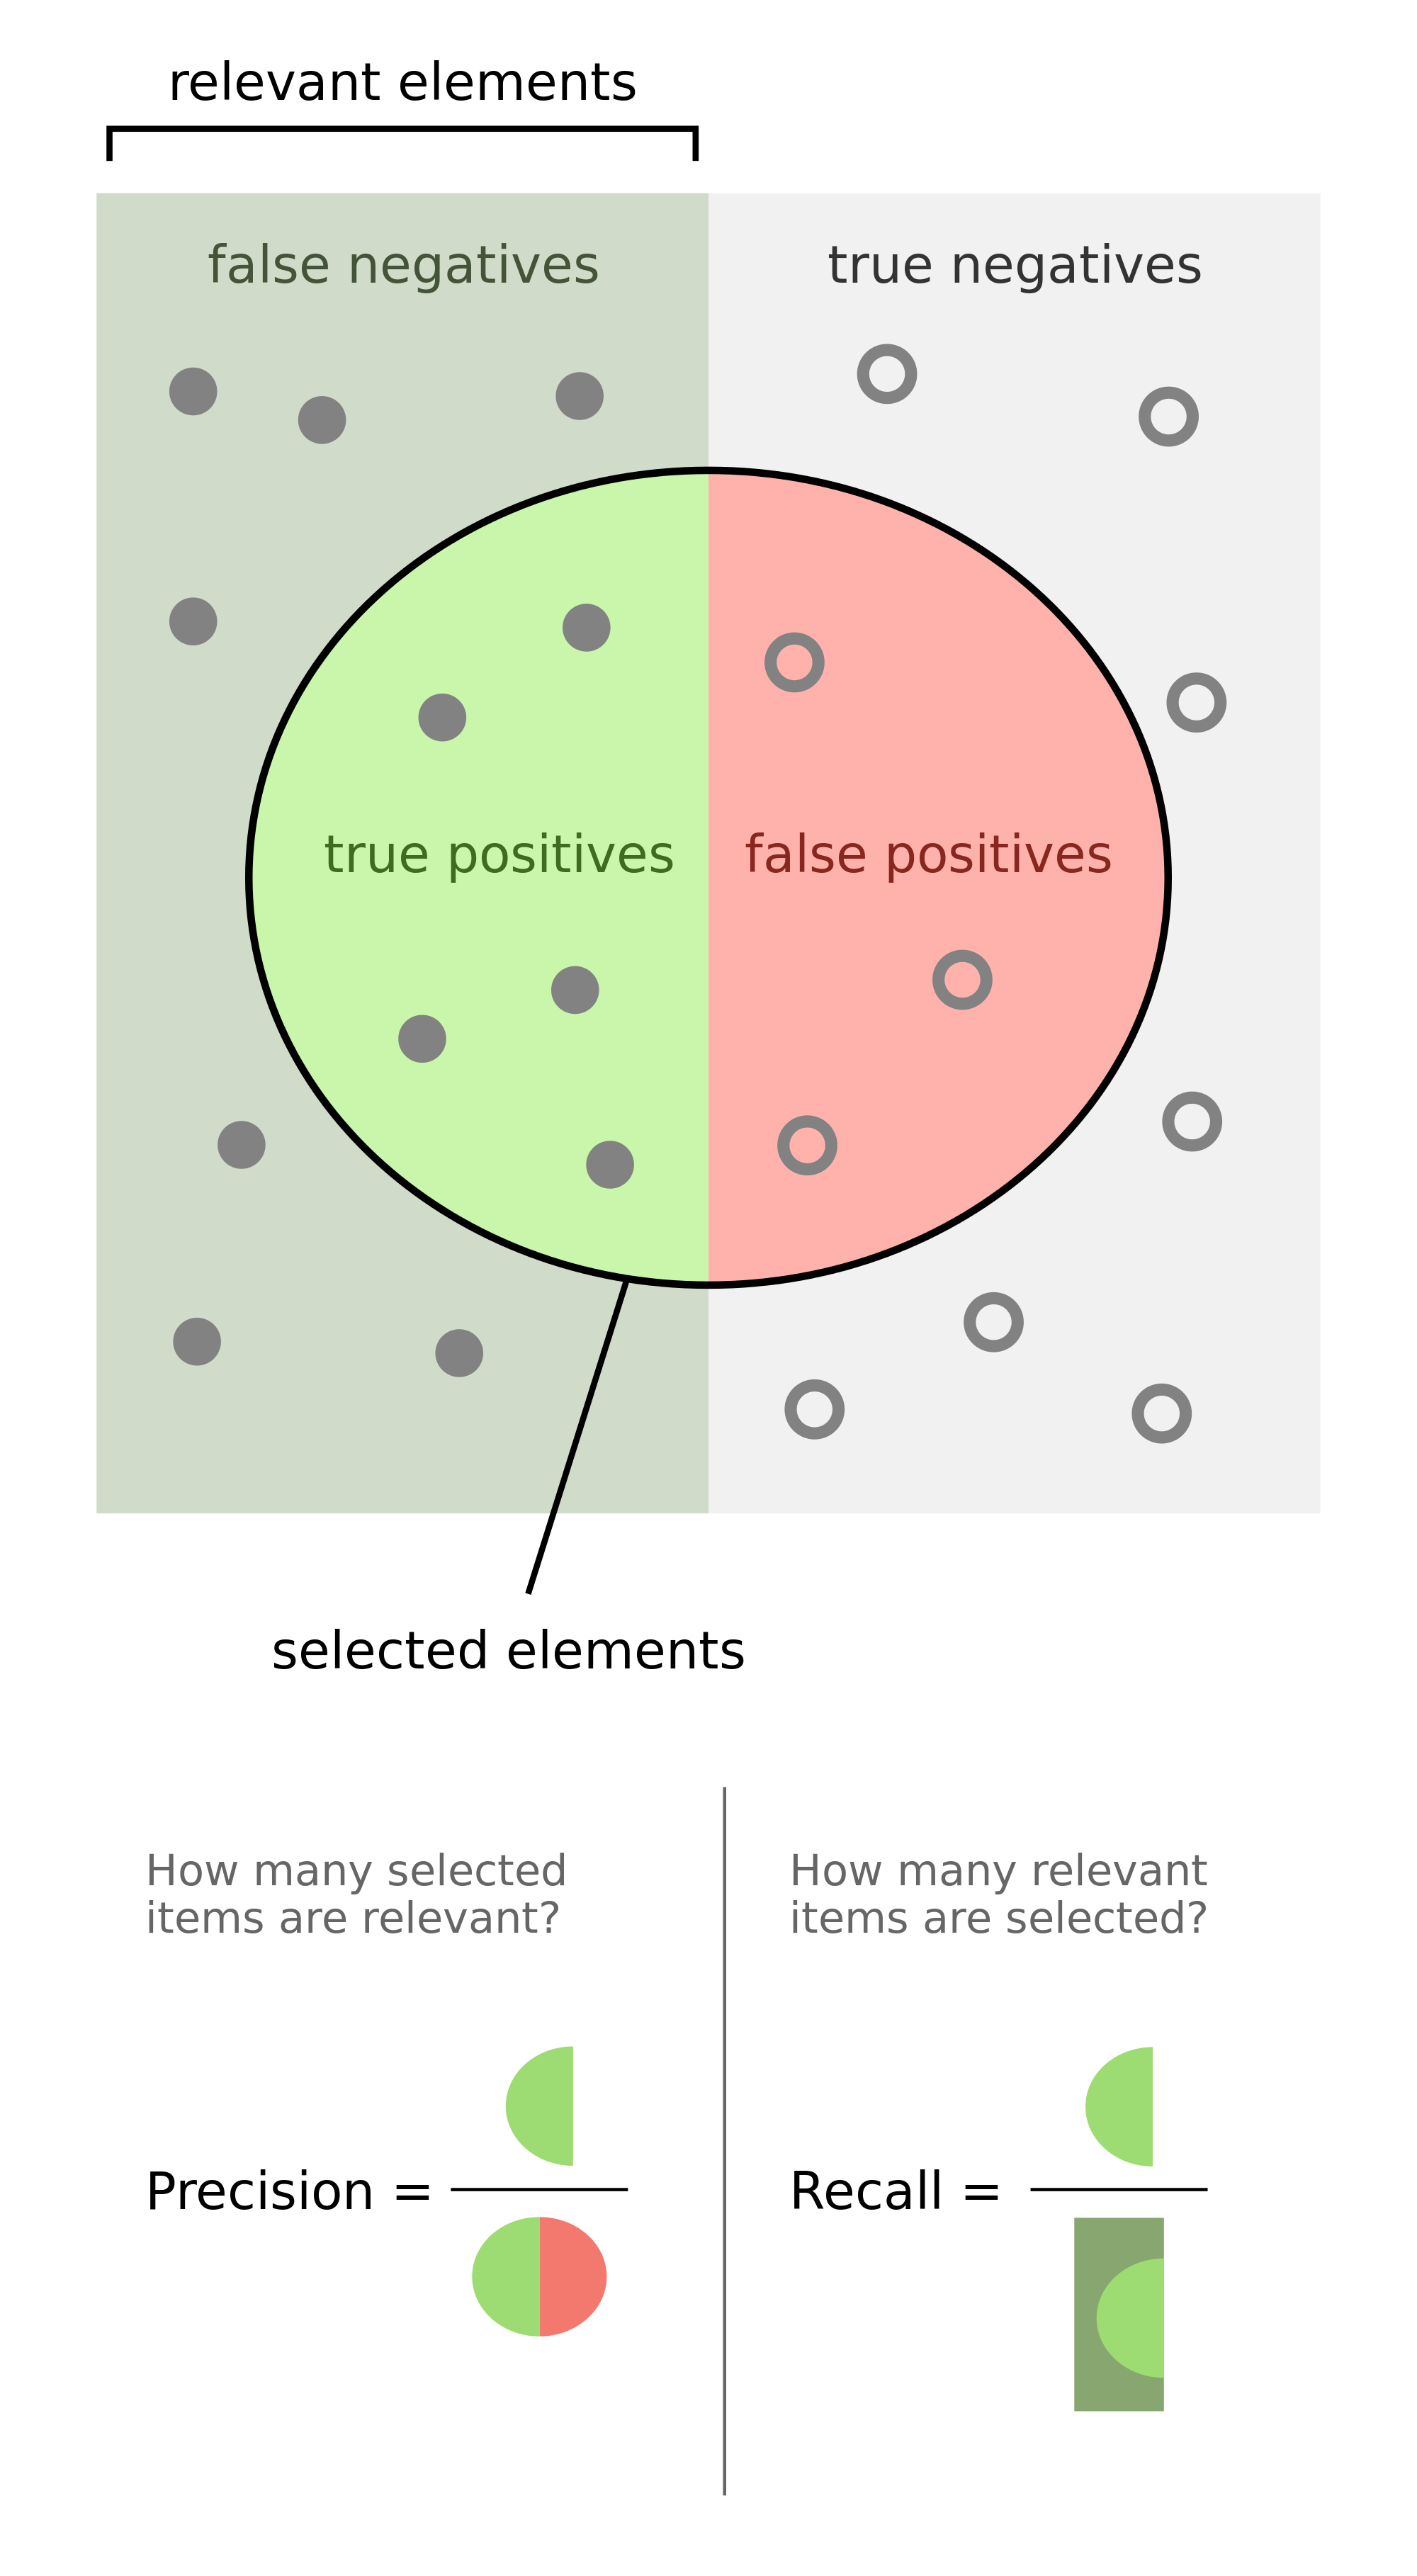

In [8]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/2000px-Precisionrecall.svg.png", height=700, width=700)

### Step 0: google search! study up on logistic regression

In [9]:
logistic_regression_url = 'http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/'
HTML('<iframe src={0} width=1100 height=500></iframe>'.format(logistic_regression_url))

### Step 1: synthesize data! generate custom dataset

##### TODO: R-P Graph

##### TODO: ROC Graph

##### TODO: Understand Thresholds and make Graph

##### Example:

In [29]:
understanding_thresholds_AUC_url = 'http://www.navan.name/roc/'
HTML('<iframe src={0} width=1100 height=700></iframe>'.format(understanding_thresholds_AUC_url))

In [14]:
import pandas as pd

In [23]:
import numpy as np

np.random.seed(0)
TRAIN_SIZE = 1e6
N_FEATURES = 10

synthetic_data = np.random.rand(TRAIN_SIZE, N_FEATURES)
binary_labels = map(lambda x : int(np.rint(x)), np.random.rand(TRAIN_SIZE))
synthetic_df = pd.DataFrame(synthetic_data)
synthetic_df.columns = map(lambda i : 'feature{0}'.format(i) , range(N_FEATURES))
synthetic_df['label'] = binary_labels
synthetic_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,label
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,1
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012,1
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662,1
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820,1
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711,0


In [25]:
synthetic_df.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,label
count,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,0.499965,0.500253,4.999567e-01,5.004008e-01,0.500601,4.997489e-01,0.499377,5.005588e-01,4.995945e-01,0.499540,0.500035
std,0.288593,0.288863,2.888428e-01,2.885783e-01,0.288446,2.885616e-01,0.288668,2.885843e-01,2.888507e-01,0.288727,0.500000
min,0.000002,0.000002,1.637144e-07,7.071203e-07,0.000001,2.516784e-08,0.000001,1.890490e-07,2.067514e-07,0.000001,0.000000
25%,0.250062,0.250229,2.497445e-01,2.503947e-01,0.251035,2.498868e-01,0.249382,2.507057e-01,2.490261e-01,0.249211,0.000000
50%,0.499909,0.500310,5.004746e-01,5.010286e-01,0.501220,4.996770e-01,0.499010,5.010783e-01,4.999398e-01,0.499127,1.000000
75%,0.750029,0.750419,7.500525e-01,7.501759e-01,0.750354,7.493738e-01,0.749527,7.503073e-01,7.500404e-01,0.749684,1.000000
max,0.999999,0.999999,9.999993e-01,9.999999e-01,1.000000,9.999998e-01,0.999997,9.999997e-01,9.999982e-01,0.999999,1.000000


### Step 2: Real world data? Try Titanic

https://www.kaggle.com/c/titanic/data

In [26]:
titanic_training_df = pd.read_csv('precision-recall/train.csv')
titanic_training_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 3: Shoe data